### Кейс: Классификация вин

Задача: придумать модель, которая будет отличать хорошее вино от плохого.

Датасет взят с https://www.kaggle.com/danielpanizzo/wine-quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('C:/Users/lizat/Downloads/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'] = df['quality'].apply(lambda x: np.where(x >= 7,1,0))
data = df.iloc[:,:-1].values
target = df['quality'].values

In [4]:
display(df[df['quality']==1].count()[0]) # заметим, что классы имбалансные
display(df[df['quality']==0].count()[0])

217

1382

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                     test_size=0.3, stratify=target, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])

n_neighbors=[1, 2, 3, 4, 8, 12, 16, 20, 24, 30, 38]
p=[1,2,3]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler(),Normalizer()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring = 'f1_weighted') # при имбалансных классах
                                                                                                  # смотрим на точность и полноту
                                                                                                  # f1 - среднее между ними
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=8,
                                                              p=1,
                                                              weights='distance')],
                          'classifier__n_neighbors': [1, 2, 3, 4, 8, 12, 16, 20,
                                                      24, 30, 38],
                          'classifier__p': [1, 2, 3],
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True, scoring='f1_weighted')

In [6]:
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

,102,53,125,100,140,117,78,189,77,118,...,227,179,187,219,235,203,211,259,251,243
mean_fit_time,0.00600524,0.0029779,0.00408273,0.00389214,0.00167079,0.00385337,0.0100266,0.00367799,0.004286,0.0126355,...,0.00143223,0.00369949,0.00359712,0.00497532,0.00400338,0.0049561,0.00216746,0.0038898,0.00794163,0.00287914
std_fit_time,0.00353895,0.00176892,0.000733159,0.00268168,0.00236629,0.003402,0.00179579,0.00301645,0.00358104,0.00389643,...,0.00286446,0.00126497,0.00301332,0.00397495,0.00273825,0.0015512,0.00186992,0.00485942,0.00635898,0.00113662
mean_score_time,0.00810175,0.00993643,0.00791836,0.00668087,0.0779029,0.130808,0.00454335,0.118974,0.00766158,0.121082,...,0.0154823,0.0131152,0.0352007,0.0159077,0.0527306,0.0154963,0.0389736,0.0555254,0.0252306,0.0138143
std_score_time,0.00365373,0.00282552,0.000924279,0.00410173,0.0120516,0.0389199,0.00436705,0.013431,0.00363587,0.0268102,...,0.00182321,0.000278454,0.00274142,0.00373696,0.0143597,0.00324621,0.001301,0.0155577,0.00944817,0.00116883
param_classifier,"KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...",...,"KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh...","KNeighborsClassifier(n_neighbors=8, p=1, weigh..."
param_classifier__n_neighbors,8,3,12,8,12,8,4,20,4,8,...,30,20,20,30,30,24,24,38,38,38
param_classifier__p,1,1,1,1,3,3,1,3,1,3,...,2,2,3,1,3,2,3,3,2,1
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,RobustScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),RobustScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


In [7]:
res = gridresults.sort_values(["rank_test_score"])
res[res['rank_test_score']==1] # best
grid.cv_results_['params'][102]

{'classifier': KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'),
 'classifier__n_neighbors': 8,
 'classifier__p': 1,
 'classifier__weights': 'distance',
 'preprocessing': RobustScaler()}

In [8]:
res[res['rank_test_score']==193] # middle
grid.cv_results_['params'][185]

{'classifier': KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'),
 'classifier__n_neighbors': 20,
 'classifier__p': 3,
 'classifier__weights': 'uniform',
 'preprocessing': StandardScaler()}

In [9]:
res[res['rank_test_score']==262].sort_index() # worst
grid.cv_results_['params'][243]

{'classifier': KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'),
 'classifier__n_neighbors': 38,
 'classifier__p': 1,
 'classifier__weights': 'uniform',
 'preprocessing': Normalizer()}

In [10]:
# best через контейнер

# from joblib import Memory
# from tempfile import mkdtemp

# cachedir = mkdtemp()
# cachedir2 = mkdtemp()

# memory = Memory(cachedir=cachedir, verbose=10)
# memory2 = Memory(cachedir=cachedir2, verbose=10)

# from sklearn.pipeline import make_pipeline

# preproc_1, model_1 = map(grid.cv_results_['params'][102].get, ['preprocessing','classifier'])

# pipe_best=make_pipeline(preproc_1, model_1, memory=memory2)
# pipe_best.fit(X_train, y_train)
# y_best = pipe_best.predict(X_test)


# display(pipe_best.score(X_train, y_train))
# display(pipe_best.score(X_test, y_test))
# pipe_best

In [11]:
# middle через контейнер

# preproc_2, model_2 = map(grid.cv_results_['params'][185].get, ['preprocessing','classifier'])
# pipe_mid = make_pipeline(preproc_2, model_2,memory = memory)
# pipe_mid.fit(X_train, y_train)
# y_mid = pipe_mid.predict(X_test)
# y_mid_proba = pipe_mid.predict_proba(X_test)

# display(pipe_mid.score(X_train, y_train))
# display(pipe_mid.score(X_test, y_test))
# pipe_mid

In [12]:
# worst через контейнер

# preproc_3, model_3 = map(grid.cv_results_['params'][243].get, ['preprocessing','classifier'])

# pipe_worse = make_pipeline(preproc_3, model_3)
# pipe_worse.fit(X_train, y_train)
# y_worse = pipe_worse.predict(X_test)
# y_worse_proba = pipe_worse.predict_proba(X_test)

# display(pipe_worse.score(X_train, y_train))
# display(pipe_worse.score(X_test, y_test))
# pipe_worse

In [13]:
# best без контейнера
scaler = RobustScaler()
scaler.fit(X_train) # Перемасштабирование  


X_train_scaled_1 = scaler.transform(X_train) # перемасштабировали тренировочный набор (преобразовали данные)
X_test_scaled_1 = scaler.transform(X_test)   # перемасштабировали тестовый набор


knn_1 = KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')
knn_1.fit(X_train_scaled_1, y_train)
y_best=knn_1.predict(X_test_scaled_1)

sc_train = knn_1.score(X_train_scaled_1, y_train)
sc_test =  knn_1.score(X_test_scaled_1,  y_test)
display(sc_train)
display(sc_test)

1.0

0.9145833333333333

In [14]:
# middle без контейнера
scaler = StandardScaler() 
scaler.fit(X_train) # Перемасштабирование


X_train_scaled_2 = scaler.transform(X_train) # перемасштабировали тренировочный набор (преобразовали данные)
X_test_scaled_2 = scaler.transform(X_test)   # перемасштабировали тестовый набор

knn_2 = KNeighborsClassifier(n_neighbors=20, p=3, weights='uniform')
knn_2.fit(X_train_scaled_2, y_train)
y_mid=knn_2.predict(X_test_scaled_2)

sc_train = knn_2.score(X_train_scaled_2 , y_train)
sc_test =  knn_2.score(X_test_scaled_2 ,  y_test)
display(sc_train)
display(sc_test)

0.8739946380697051

0.8833333333333333

In [15]:
# worst без контейнера
scaler = Normalizer()
scaler.fit(X_train) # Перемасштабирование 


X_train_scaled_3 = scaler.transform(X_train) # перемасштабировали тренировочный набор (преобразовали данные)
X_test_scaled_3 = scaler.transform(X_test)   # перемасштабировали тестовый набор

knn_3 = KNeighborsClassifier(n_neighbors=38, p=1, weights='uniform')
knn_3.fit(X_train_scaled_3, y_train)
y_worse=knn_3.predict(X_test_scaled_3)

sc_train = knn_3.score(X_train_scaled_3 , y_train)
sc_test =  knn_3.score(X_test_scaled_3 ,  y_test)
display(sc_train)
display(sc_test)

0.8641644325290437

0.8645833333333334

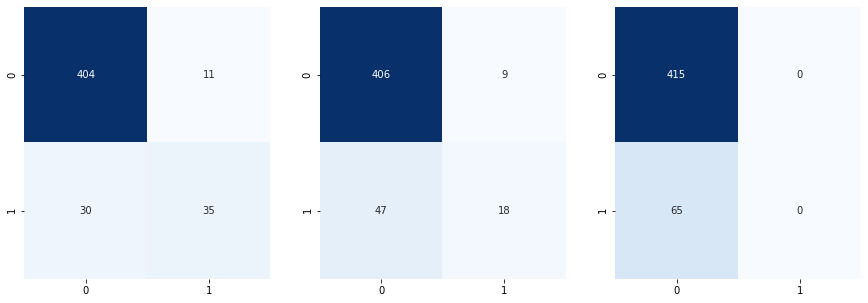

In [16]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_best)
matrix_2=confusion_matrix(y_test,y_mid)
matrix_3=confusion_matrix(y_test,y_worse)

fig,ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");


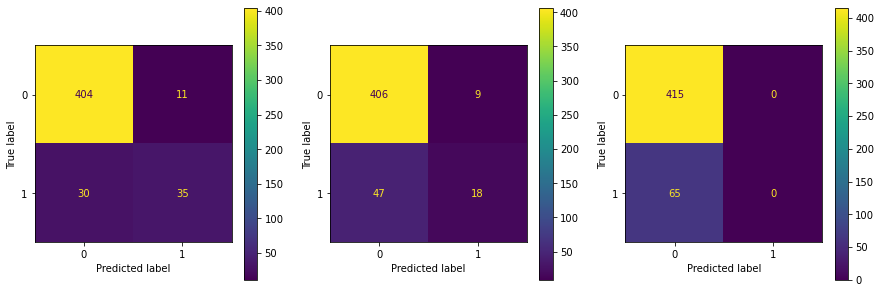

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);
ConfusionMatrixDisplay(matrix_3).plot(ax = ax3);

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_best))
print(classification_report(y_test, knn_1.predict(X_test_scaled_1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       415
           1       0.76      0.54      0.63        65

    accuracy                           0.91       480
   macro avg       0.85      0.76      0.79       480
weighted avg       0.91      0.91      0.91       480

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       415
           1       0.76      0.54      0.63        65

    accuracy                           0.91       480
   macro avg       0.85      0.76      0.79       480
weighted avg       0.91      0.91      0.91       480



In [19]:
print(classification_report(y_test, y_mid))
print(classification_report(y_test, knn_2.predict(X_test_scaled_2)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       415
           1       0.67      0.28      0.39        65

    accuracy                           0.88       480
   macro avg       0.78      0.63      0.66       480
weighted avg       0.87      0.88      0.86       480

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       415
           1       0.67      0.28      0.39        65

    accuracy                           0.88       480
   macro avg       0.78      0.63      0.66       480
weighted avg       0.87      0.88      0.86       480



In [20]:
print(classification_report(y_test, y_worse))
print(classification_report(y_test, y_worse, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       415
           1       0.00      0.00      0.00        65

    accuracy                           0.86       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.75      0.86      0.80       480

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       415
           1       0.00      0.00      0.00        65

    accuracy                           0.86       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.75      0.86      0.80       480



C:\Users\lizat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lizat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lizat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# графики для контейнеров

# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve


# pipe_best.fit(X_train, y_train)
# fig = plot_precision_recall_curve(pipe_best, X_test, y_test, ax = plt.gca(), name = "Best")

# pipe_mid.fit(X_train, y_train)
# fig = plot_precision_recall_curve(pipe_mid,  X_test, y_test, ax = plt.gca(), name = "Middle");

# pipe_worse.fit(X_train, y_train)
# fig = plot_precision_recall_curve(pipe_worse,  X_test, y_test, ax = plt.gca(), name = "Worse");

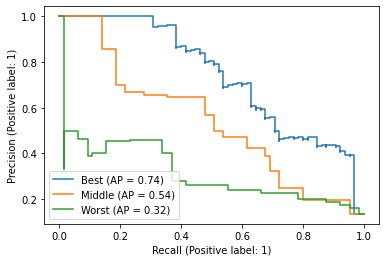

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

fig = plot_precision_recall_curve(knn_1, X_test_scaled_1,  y_test, ax = plt.gca(), name = "Best")

fig = plot_precision_recall_curve(knn_2, X_test_scaled_2,  y_test, ax = plt.gca(), name = "Middle");

fig = plot_precision_recall_curve(knn_3, X_test_scaled_3,  y_test, ax = plt.gca(), name = "Worst");

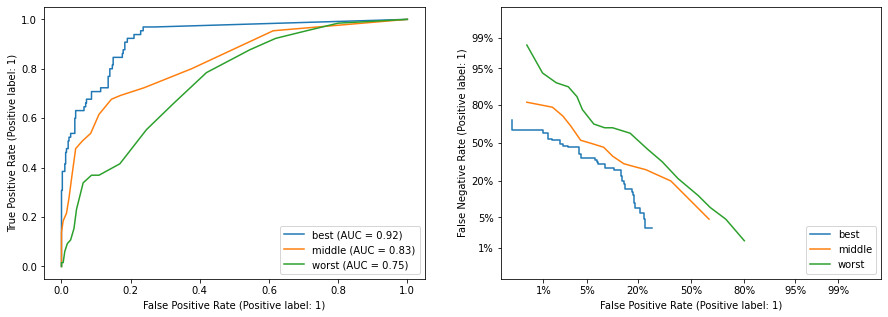

In [23]:
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 5))

plot_roc_curve(knn_1, X_test_scaled_1,  y_test, ax=ax_roc, name='best');
plot_det_curve(knn_1, X_test_scaled_1,  y_test, ax=ax_det, name='best');

plot_roc_curve(knn_2, X_test_scaled_2,  y_test, ax=ax_roc, name='middle');
plot_det_curve(knn_2, X_test_scaled_2,  y_test, ax=ax_det, name='middle');

plot_roc_curve(knn_3, X_test_scaled_3,  y_test, ax=ax_roc, name='worst');
plot_det_curve(knn_3, X_test_scaled_3,  y_test, ax=ax_det, name='worst');

In [24]:
# графики для контейнеров

# from sklearn.metrics import plot_det_curve
# from sklearn.metrics import plot_roc_curve

# fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(15, 5))
# pipe_best.fit(X_train, y_train)
# plot_roc_curve(pipe_best, X_test, y_test, ax=ax_roc, name='best')
# plot_det_curve(pipe_best,  X_test, y_test, ax=ax_det, name='best')

# pipe_mid.fit(X_train, y_train)
# plot_roc_curve(pipe_mid, X_test, y_test, ax=ax_roc, name='mid')
# plot_det_curve(pipe_mid,  X_test, y_test, ax=ax_det, name='mid')

# pipe_worse.fit(X_train, y_train)
# plot_roc_curve(pipe_worse, X_test, y_test, ax=ax_roc, name='worse')
# plot_det_curve(pipe_worse,  X_test, y_test, ax=ax_det, name='worse')